In [8]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [9]:
df_atvi = pd.read_csv("atvi_weekly_return_volatility.csv")
df_spy = pd.read_csv("spy_weekly_return_volatility.csv")

In [10]:
def train_test_yr2(df, stocks):
    df_yr1 = df[df["Year"] == 2021]
    df_yr1_X = df_yr1[["mean_return", "volatility"]].values
    df_yr1_Y = df_yr1[["Label"]].values.flatten()
    
    ld_clf = LinearDiscriminantAnalysis().fit(df_yr1_X, df_yr1_Y)
    qd_clf = QuadraticDiscriminantAnalysis().fit(df_yr1_X, df_yr1_Y)
    
    df_yr2 = df[df["Year"] == 2022]
    df_yr2_X = df_yr2[["mean_return", "volatility"]].values
    y_true = df_yr2[["Label"]].values.flatten()
    y_pred_ld = ld_clf.predict(df_yr2_X)
    y_pred_qd = qd_clf.predict(df_yr2_X)
    print(f"Accuracy on year 2 for linear discriminant -> {round(100*accuracy_score(y_true, y_pred_ld), 2)} %")
    print(f"Accuracy on year 2 for quadratic discriminant -> {round(100*accuracy_score(y_true, y_pred_qd), 2)} %\n")
    
    conf_matrix = confusion_matrix(y_true, y_pred_ld)
    tn = conf_matrix[0][0]
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    tpr = round((tp/(tp + fn))*100, 2)
    tnr = round((tn/(tn + fp))*100, 2)
    print(f"Recall for Linear Discriminant -> {tpr} %")
    print(f"Specitivity for Linear Discriminant -> {tnr} %\n")
    ConfusionMatrixDisplay(conf_matrix, display_labels=["red", "green"]).plot()
    plt.show()
    
    conf_matrix = confusion_matrix(y_true, y_pred_qd)
    tn = conf_matrix[0][0]
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    tpr = round((tp/(tp + fn))*100, 2)
    tnr = round((tn/(tn + fp))*100, 2)
    print(f"Recall for Quadratic Discriminant -> {tpr} %")
    print(f"Specitivity for Quadratic Discriminant -> {tnr} %")
    ConfusionMatrixDisplay(conf_matrix, display_labels=["red", "green"]).plot()
    plt.show()
    
    i1, i2, i3 = 100, 100, 100
    bnh = []
    trade_ld, trade_qd = [], []
    df_yr2_ret = np.array(df_yr2["mean_return"])
    for i in range(y_pred_ld.shape[0]):
        i1 = i1*(1 + df_yr2_ret[i]/100)
        if y_pred_ld[i] == "green":
            i2 = i2*(1 + df_yr2_ret[i]/100)
        if y_pred_qd[i] == "green":
            i3 = i3*(1 + df_yr2_ret[i]/100)
        bnh.append(i1)
        trade_ld.append(i2)
        trade_qd.append(i3)

    plt.figure(figsize=(15, 10))
    plt.plot(bnh)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - Buy and Hold")
    plt.show()
    
    plt.figure(figsize=(15, 10))
    plt.plot(trade_ld)
    plt.plot(trade_qd)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - According to Discriminant predicted labels")
    plt.legend(["Linear Discriminant", "Quadratic Discriminant"])
    plt.show()
    
    print(f"Final Amount for BnH -> $ {round(i1, 2)}")
    print(f"Final Amount for Linear Discriminant -> $ {round(i2, 2)}")
    print(f"Final Amount for Quadratic Discriminant -> $ {round(i3, 2)}")

Accuracy on year 2 for linear discriminant -> 42.31 %
Accuracy on year 2 for quadratic discriminant -> 32.69 %

Recall for Linear Discriminant -> 16.13 %
Specitivity for Linear Discriminant -> 80.95 %



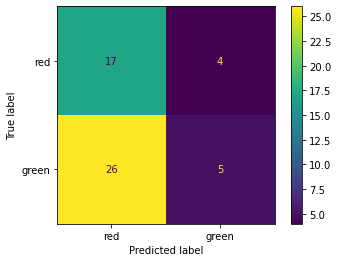

Recall for Quadratic Discriminant -> 6.45 %
Specitivity for Quadratic Discriminant -> 71.43 %


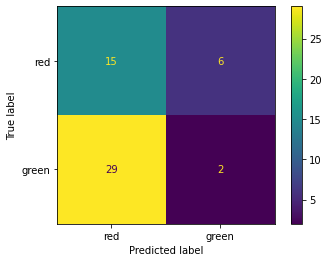

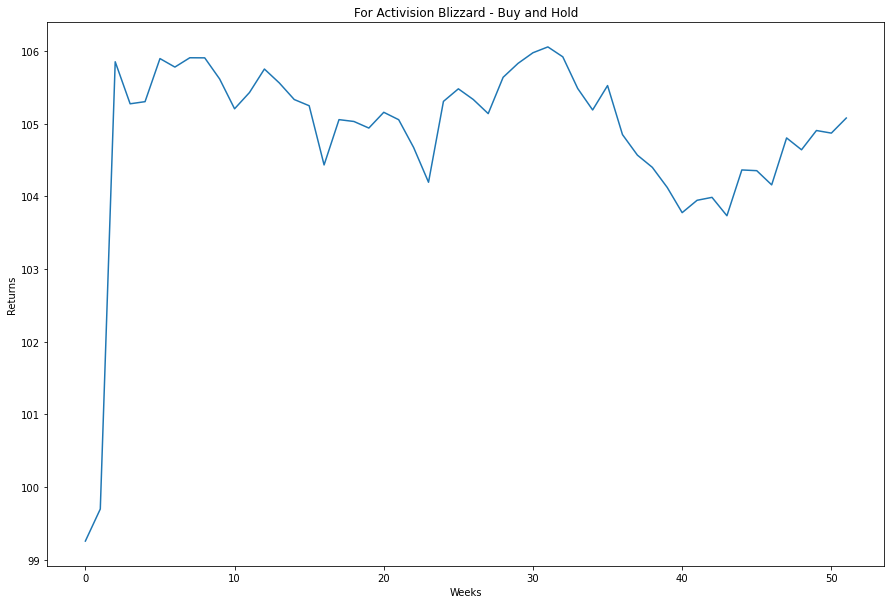

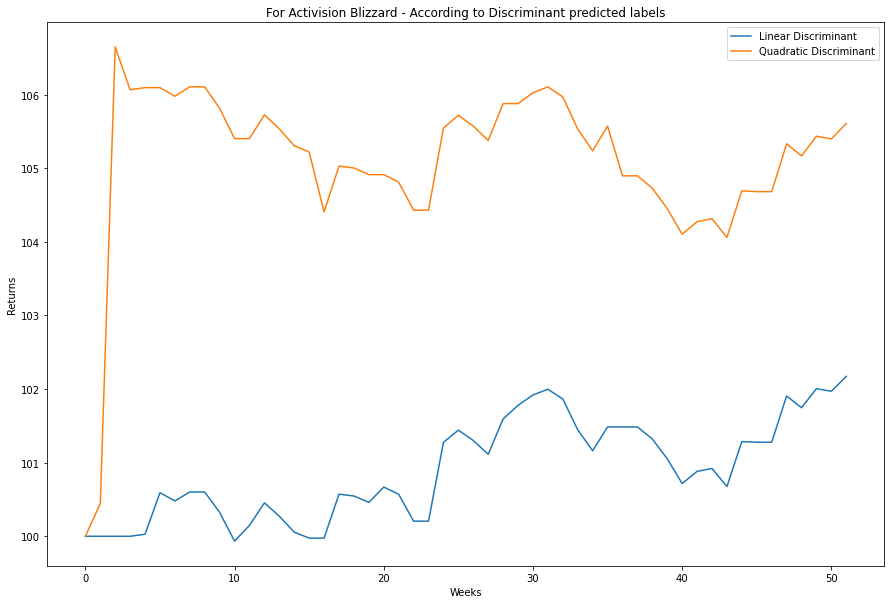

Final Amount for BnH -> $ 105.08
Final Amount for Linear Discriminant -> $ 102.17
Final Amount for Quadratic Discriminant -> $ 105.61


In [11]:
train_test_yr2(df_atvi, "Activision Blizzard")

Accuracy on year 2 for linear discriminant -> 38.46 %
Accuracy on year 2 for quadratic discriminant -> 34.62 %

Recall for Linear Discriminant -> 5.88 %
Specitivity for Linear Discriminant -> 100.0 %



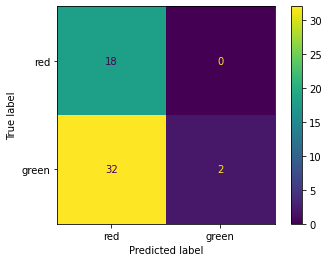

Recall for Quadratic Discriminant -> 14.71 %
Specitivity for Quadratic Discriminant -> 72.22 %


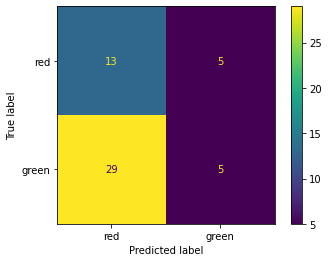

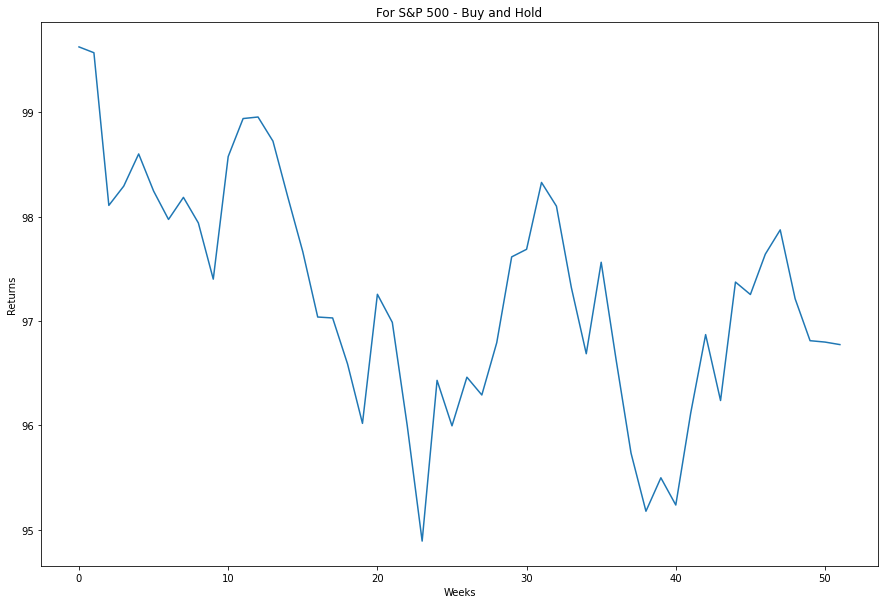

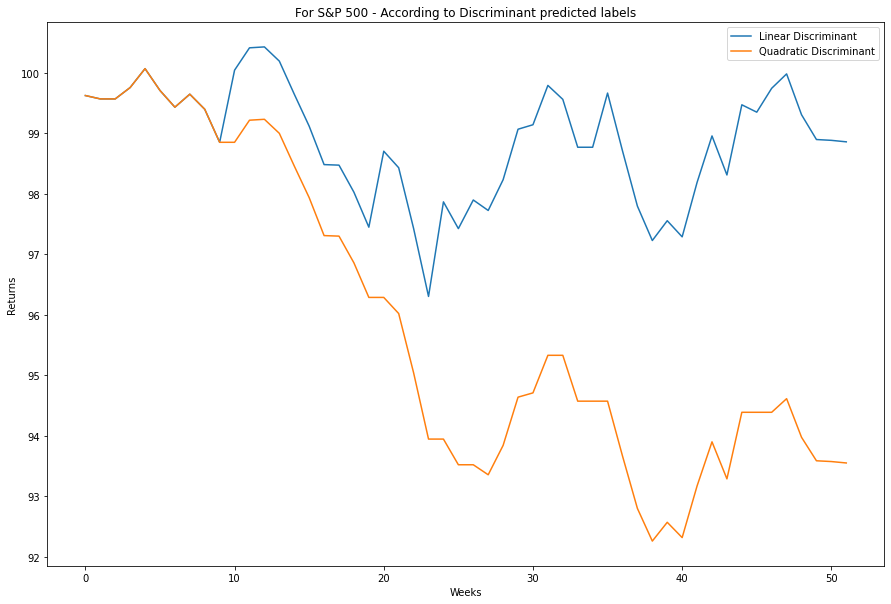

Final Amount for BnH -> $ 96.77
Final Amount for Linear Discriminant -> $ 98.86
Final Amount for Quadratic Discriminant -> $ 93.55


In [12]:
train_test_yr2(df_spy, "S&P 500")